<h1>Advanced LSTM</h1>
we will cover following techniques of Advanced LSTM<br>

* Recurrent dropout --> This is a specific, built-in way to use dropout to fight overfitting in recurrent layers. <br>
* Stacking recurrent layers —> This increases the representational power of the network (at the cost of higher computational loads).<br>
* Bidirectional recurrent layers —> These present the same information to a recurrent network in different ways, increasing accuracy and mitigating forgetting issues. <br>

All these techniques will be applied on <h3>Temperature Forcasting Problem</h3>

<h4>About Temperature Forcasting Problem</h4>

In this problem we will play with weather station data to predict the weather for 24hrs

In this dataset, 14 different quantities (such air temperature, atmospheric pressure, humidity, wind direction, and so on) were recorded every 10 minutes, over several years. The original data goes back to 2003, but this example is limited to data
from 2009–2016. This dataset is perfect for learning to work with numerical
timeseries. You’ll use it to build a model that takes as input some data from the recent
past (a few days’ worth of data points) and predicts the air temperature 24 hours in
the future.

<h4>Inspecting the data

In [1]:
import pandas as pd

file = './jena_climate_2009_2016.csv/jena_climate_2009_2016.csv'
data = pd.read_csv(file)
data

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420446,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420447,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420448,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420449,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420451 entries, 0 to 420450
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420451 non-null  object 
 1   p (mbar)         420451 non-null  float64
 2   T (degC)         420451 non-null  float64
 3   Tpot (K)         420451 non-null  float64
 4   Tdew (degC)      420451 non-null  float64
 5   rh (%)           420451 non-null  float64
 6   VPmax (mbar)     420451 non-null  float64
 7   VPact (mbar)     420451 non-null  float64
 8   VPdef (mbar)     420451 non-null  float64
 9   sh (g/kg)        420451 non-null  float64
 10  H2OC (mmol/mol)  420451 non-null  float64
 11  rho (g/m**3)     420451 non-null  float64
 12  wv (m/s)         420451 non-null  float64
 13  max. wv (m/s)    420451 non-null  float64
 14  wd (deg)         420451 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


<h4>Note</h4>
datatime is in object but we need it in the form of datatime so 
converting it, we need them in the form of data time

In [3]:
data['Date Time']= pd.to_datetime(data['Date Time'],  format="%d.%m.%Y %H:%M:%S")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420451 entries, 0 to 420450
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date Time        420451 non-null  datetime64[ns]
 1   p (mbar)         420451 non-null  float64       
 2   T (degC)         420451 non-null  float64       
 3   Tpot (K)         420451 non-null  float64       
 4   Tdew (degC)      420451 non-null  float64       
 5   rh (%)           420451 non-null  float64       
 6   VPmax (mbar)     420451 non-null  float64       
 7   VPact (mbar)     420451 non-null  float64       
 8   VPdef (mbar)     420451 non-null  float64       
 9   sh (g/kg)        420451 non-null  float64       
 10  H2OC (mmol/mol)  420451 non-null  float64       
 11  rho (g/m**3)     420451 non-null  float64       
 12  wv (m/s)         420451 non-null  float64       
 13  max. wv (m/s)    420451 non-null  float64       
 14  wd (deg)         420

In [4]:
data.set_index("Date Time",inplace = True, drop = True) # reset the index
data_arr = data.values # converting to the numpy array

In [5]:
print(data_arr.shape)

(420451, 14)


plotting the temperature timeseries


Text(0.5, 1.0, 'Graph of whole data set')

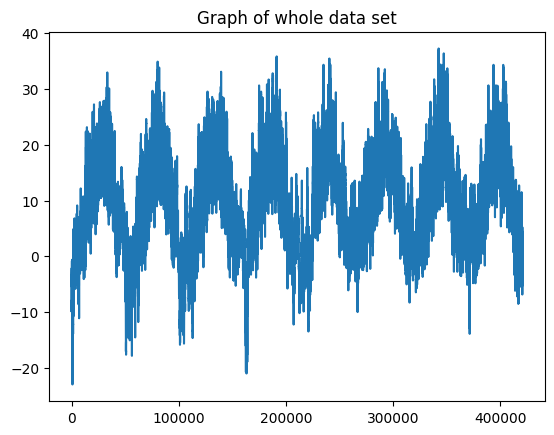

In [6]:
from matplotlib import pyplot as plt
temp = data_arr[:,1]  
#The line temp = d[:, 1] extracts the second column (index 1) 
#of the NumPy array d and stores it in a variable named temp. 
# This column contains temperature data.

plt.plot(range(len(temp)),temp)
plt.title("Graph of whole data set")

Text(0.5, 1.0, 'Temperature over first 10 days')

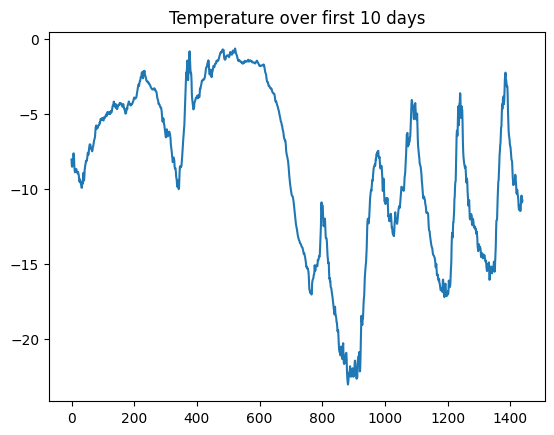

In [7]:
# plotting the temperature of first 10 days

plt.plot(range(1440),temp[:1440])
plt.title("Temperature over first 10 days")


<h3>Our target and what we want to do</h3>
we want to look back the data of 5 days and then predict the temperature of the next day
<br>
loockback = 720 means that will go back to 5 days
<br>
steps = 6 This parameter indicates how frequently you'll sample the data. You'll sample one data point per hour, which means that you'll take temperature readings every hour. This helps in reducing the amount of data and simplifying the problem by summarizing the hourly data.
<br>
delay = 144: This parameter determines the time into the future you want to predict. You want to predict the temperature 24 hours (144 * 10 minutes) into the future. In other words, you want to forecast what the temperature will be one day from the current time

<br><br>
But we have to normalize the data as data is in different forms and values
<h4> Normalization

You’ll preprocess the data by subtracting the mean of each timeseries and dividing by
the standard deviation. You’re going to use the first 200,000 timesteps as training data,
so compute the mean and standard deviation only on this fraction of the data.

In [8]:
mean  = data_arr[:200000].mean(axis = 0)
data_arr -=mean

std = data_arr[:200000].std(axis = 0)
data_arr /= std

In [9]:
data_arr[2]

array([ 0.90132666, -1.98671006, -2.03683914, -1.92001611,  1.10872183,
       -1.32302805, -1.49757814, -0.80281834, -1.49877598, -1.50167321,
        2.18235418, -1.27614304, -1.26122763, -0.05330633])

<h4>Data generator</h4>
* data—The original array of floating-point data, which you normalized in listing 6.32. <br>
* lookback—How many timesteps back the input data should go.
<br>
* delay—How many timesteps in the future the target should be.
<br>
* min_index and max_index—Indices in the data array that delimit which timesteps to draw from. This is useful for keeping a segment of the data for validation and another for testing.
<br>
* shuffle—Whether to shuffle the samples or draw them in chronological order. (here shuffle means the batch we have drawn from the data has to be shuffle or not)
<br>
* batch_size—The number of samples per batch.
<br>
* step—The period, in timesteps, at which you sample data. You’ll set it to 6 in order to draw one data point every hour. 

<br><br>
we are making this custome generator so that we can set the lockback and all the things according to our on will

In [10]:
import numpy as np

In [11]:
def generator(data , lookback , delay , min_index , max_index, shuffle = False,
              batch_size = 128, step = 6 ):
    if(max_index is None):
        max_index = len(data)-delay-1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback , max_index,size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i ,min(i + batch_size,max_index))
            i +=len(rows)
        samples = np.zeros((len(rows), lookback//step , data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j , row in enumerate(rows):
            indices = range(rows[j] - lookback ,rows[j],step)
            samples[j] = data[indices]
            targets[j] = data[rows[j]+delay][1]
        yield samples , targets


<h3>Abstract Generator</h3>
function to instantiate three generators: one for
training, one for validation, and one for testing. Each will look at different temporal
segments of the original data: the training generator looks at the first 200,000 timesteps, the validation generator looks at the following 100,000, and the test generator
looks at the remainder.

In [12]:
# preparing the training , validation and test generator
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(data_arr,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle = True,
                      step = step,
                      batch_size=batch_size)


validation generator 

In [13]:
val_gen = generator(data_arr,
                    lookback= lookback,
                    delay=delay,
                    min_index=200001,
                    max_index = 300000,
                    step =step,
                    batch_size=batch_size)

test generator

In [14]:
test_gen= generator( data_arr,
                   lookback=lookback,
                   delay= delay,
                   min_index=300001,
                   max_index=None,
                   step = step,
                   batch_size=batch_size)

In [15]:
#How many steps to draw from val_gen in 
# order to see the entire validation set
val_steps = (300000 - 200001 - lookback)
# How many steps to draw from 
# test_gen in order to see the entire test set
test_steps = (len(data_arr) - 300001 - lookback)

In [16]:
# this function is basically calculating the error 
# for our common sence technique
# Mean Absolute Error
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))

Explanation of above code<br>
batch_maes = []: This line initializes an empty list called batch_maes. This list will be used to store the Mean Absolute Error (MAE) values for each batch of predictions.

for step in range(val_steps):: This is a for loop that iterates val_steps times. val_steps likely represents the number of validation steps or batches you want to evaluate the baseline on.

samples, targets = next(val_gen): Within each iteration of the loop, this line uses the next() function to retrieve the next batch of validation data from the generator val_gen. The samples variable contains the input data (historical temperature values), and the targets variable contains the true target values (actual temperatures).

preds = samples[:, -1, 1]: This line extracts the predicted temperature values from the last timestep of each sample in the batch. It assumes that the temperature 24 hours from now will be the same as the temperature right now, which is a simple naive baseline approach.

mae = np.mean(np.abs(preds - targets)): This line calculates the Mean Absolute Error (MAE) between the predicted temperatures (preds) and the actual target temperatures (targets) for the current batch. MAE measures the average absolute difference between the predictions and the true values.

batch_maes.append(mae): The calculated MAE for the current batch is added to the batch_maes list. This allows you to keep track of the MAE for each batch.

After the loop has finished running, np.mean(batch_maes) calculates the mean of all the MAE values stored in the batch_maes list. This represents the overall MAE for the entire validation dataset using the naive baseline approach.

Finally, print(np.mean(batch_maes)) prints the calculated mean MAE to the console.

In [17]:
evaluate_naive_method()

0.2896994197960971


In [25]:
c = 0.29 * std[1]
c

2.567224733839344

In [43]:
print(lookback // step ,data_arr.shape[-1])

240 14


<h3>Making the model just using Simple Dense layer</h3>
as the model just have 2 layers so it is very complex 

In [15]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import RMSprop

model1 = Sequential()
model1.add(Flatten(input_shape = (lookback //step , data_arr.shape[-1])))
model1.add(Dense(32,activation='relu'))
model1.add(Dense(1))


In [16]:
model1.compile(loss='mae',optimizer=RMSprop())
history = model1.fit(train_gen,
                     steps_per_epoch=500,
                     epochs=20,
                     validation_data=val_gen,
                     validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 1122s 2s/step - loss: 1.1481 - val_loss: 0.7441
Epoch 2/20
500/500 [==============================] - 591s 1s/step - loss: 0.3783 - val_loss: 0.3199
Epoch 3/20
500/500 [==============================] - 657s 1s/step - loss: 0.2860 - val_loss: 0.2940
Epoch 4/20
500/500 [==============================] - 764s 2s/step - loss: 0.2648 - val_loss: 0.3050
Epoch 5/20
500/500 [==============================] - 529s 1s/step - loss: 0.2513 - val_loss: 0.3057
Epoch 6/20
500/500 [==============================] - 527s 1s/step - loss: 0.2433 - val_loss: 0.3258
Epoch 7/20
500/500 [==============================] - 556s 1s/step - loss: 0.2376 - val_loss: 0.3079
Epoch 8/20
500/500 [==============================] - 488s 977ms/step - loss: 0.2314 - val_loss: 0.3342
Epoch 9/20
500/500 [==============================] - 505s 1s/step - loss: 0.2282 - val_loss: 0.3138
Epoch 10/20
500/500 [==============================] - 507s 1s/step - loss: 0.2245 - va

In [ ]:
model1.save("Simple.h5")

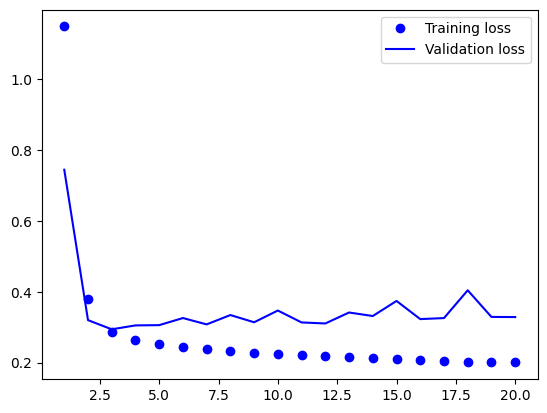

In [19]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs  = range(1,len(loss)+1)
plt.figure()
plt.plot(epochs,loss,'bo',label = "Training loss")
plt.plot(epochs,val_loss,'b',label = "Validation loss")
plt.legend()
plt.show()

<h1> About the model</h1>
The text you provided discusses an important concept in machine learning: the common-sense baseline and the limitations of the model training process. Let's break it down:

1. **Common-Sense Baseline:** The common-sense baseline is a simple, intuitive approach to solving a problem. In the context of the text, it's the idea that you can predict future temperatures by assuming they will be the same as the current temperature. This baseline provides a benchmark for how well a machine learning model should perform. If a model can't outperform this basic approach, it may not be adding much value.

2. **Difficulty of Outperforming Common Sense:** The text points out that some of the validation losses (error) of the machine learning model are close to the losses of the common-sense baseline, but not consistently better. This suggests that it's not easy for the machine learning model to outperform common sense in this particular task.

3. **The Role of Hypothesis Space:** The text explains that the reason the model doesn't reliably outperform the common-sense baseline is because the model's search space, or "hypothesis space," is limited. The model is configured as a two-layer neural network with specific parameters, making it a relatively complex model. The hypothesis space represents all the possible model configurations the training process explores.

4. **Complexity of Model:** The two-layer neural network model is already fairly complex. It has the capacity to learn patterns and relationships in the data, but it doesn't start with an innate understanding of common-sense principles like humans do.

5. **Training Objective:** The training process aims to find the best model within the defined hypothesis space. This process involves adjusting the model's weights and biases to minimize a loss function (in this case, Mean Absolute Error or MAE). The model doesn't inherently "know" that it should mimic the common-sense baseline; it's trying to minimize its loss based on the data it's given.

In summary, the text highlights that machine learning models, including neural networks, don't possess inherent common sense or prior knowledge. They learn patterns and relationships from data based on the model architecture and training objective. If the model's search space is not designed to replicate common sense, it may not naturally converge to a solution that mirrors common sense. This is why it's important to carefully design model architectures and objectives to align with the problem at hand. Sometimes, even simple solutions like the common-sense baseline can be challenging for models to discover.

<h1> Now using Recurrent baseline</h1>
Here we will use GRU (Gated Recurrent Unit) works similar to lstm.

In [18]:
from keras.layers import GRU,Dense
from keras.models import Sequential
from keras.optimizers import RMSprop

In [19]:
data_arr[-1]

array([ 1.28927851, -1.56987861, -1.65150386, -1.79581591,  0.0206812 ,
       -1.18517138, -1.44517325, -0.62927697, -1.45000738, -1.45228543,
        1.85615089, -0.5993525 , -0.690577  ,  0.10024989])

In [18]:
model2 = Sequential()
model2.add(GRU(32, input_shape=(None, data_arr.shape[-1])))
model2.add(Dense(1))

model2.compile(optimizer = RMSprop(), loss = 'mae')

model2.fit(train_gen,
           steps_per_epoch = 500,
           epochs = 20,
           validation_data = val_gen,
           validation_steps = val_steps)

Epoch 1/20
500/500 [==============================] - 1029s 2s/step - loss: 0.3070 - val_loss: 0.2704
Epoch 2/20
500/500 [==============================] - 1301s 3s/step - loss: 0.2837 - val_loss: 0.2677
Epoch 3/20
500/500 [==============================] - 953s 2s/step - loss: 0.2756 - val_loss: 0.2655
Epoch 4/20
500/500 [==============================] - 1307s 3s/step - loss: 0.2706 - val_loss: 0.2629
Epoch 5/20
500/500 [==============================] - 1744s 3s/step - loss: 0.2662 - val_loss: 0.2649
Epoch 6/20
500/500 [==============================] - 1605s 3s/step - loss: 0.2628 - val_loss: 0.2637
Epoch 7/20
500/500 [==============================] - 1076s 2s/step - loss: 0.2585 - val_loss: 0.2637
Epoch 8/20
500/500 [==============================] - 3443s 7s/step - loss: 0.2557 - val_loss: 0.2692
Epoch 9/20
500/500 [==============================] - 2678s 5s/step - loss: 0.2522 - val_loss: 0.2714
Epoch 10/20
500/500 [==============================] - 2434s 5s/step - loss: 0.2457

In [19]:
model2.save("Model2.h5")

In [21]:
model2.history.history

{'loss': [0.30700281262397766,
  0.2837027907371521,
  0.27562329173088074,
  0.27064836025238037,
  0.26622337102890015,
  0.26275399327278137,
  0.25850820541381836,
  0.25565269589424133,
  0.25224652886390686,
  0.24568411707878113,
  0.24544645845890045,
  0.2408939003944397,
  0.2368064969778061,
  0.2331574410200119,
  0.22911927103996277,
  0.2260321080684662,
  0.2223692238330841,
  0.21922454237937927,
  0.2150413990020752,
  0.21190233528614044],
 'val_loss': [0.2704387307167053,
  0.2676951587200165,
  0.2655084729194641,
  0.2628828287124634,
  0.2648552358150482,
  0.2637041509151459,
  0.26370304822921753,
  0.26918184757232666,
  0.2713695466518402,
  0.2727924883365631,
  0.27667030692100525,
  0.27523067593574524,
  0.279063880443573,
  0.28493115305900574,
  0.28788691759109497,
  0.2923101484775543,
  0.29650264978408813,
  0.3043343126773834,
  0.30787092447280884,
  0.3034425377845764]}

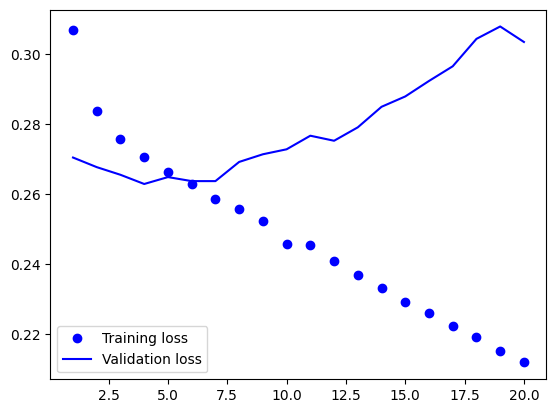

In [23]:
import matplotlib.pyplot as plt
loss = model2.history.history['loss']
val_loss = model2.history.history['val_loss']
epochs  = range(1,len(loss)+1)
plt.figure()
plt.plot(epochs,loss,'bo',label = "Training loss")
plt.plot(epochs,val_loss,'b',label = "Validation loss")
plt.legend()
plt.show()

<h4>testing the model2

In [26]:
model2.evaluate(test_gen,steps=test_steps)

119010/119010 [==============================] - 1156s 10ms/step - loss: 0.3231


0.32313355803489685

<h4>giving the custome data to it

In [6]:
custome_ar = data_arr[300012:300022]
print(custome_ar.shape)
data_arr.shape[-1]

(10, 14)


14

In [7]:
custome_ar = custome_ar.reshape((1, custome_ar.shape[0], custome_ar.shape[1]))

custome_ar.shape

(1, 10, 14)

In [61]:
custome_ar[0]

array([[ 0.53460014,  0.6238522 ,  0.5756224 ,  1.3943151 ,  1.41361234,
         0.42358994,  1.71103023, -0.80901625,  1.68994059,  1.68971835,
        -0.52776906, -0.02668357, -0.02124243, -1.83097933],
       [ 0.53460014,  0.62159295,  0.57338857,  1.39152409,  1.41361234,
         0.42098887,  1.70626614, -0.80901625,  1.68618916,  1.68266295,
        -0.52588621, -0.64490571, -0.2100291 , -1.95024517],
       [ 0.53106259,  0.61594483,  0.56892092,  1.38733756,  1.41959059,
         0.4144862 ,  1.69673798, -0.81314819,  1.6786863 ,  1.67560755,
        -0.52117909, -0.72950452, -0.50179032, -1.4663699 ],
       [ 0.52162911,  0.61029671,  0.56333635,  1.38036002,  1.41959059,
         0.40668299,  1.68482778, -0.81314819,  1.66368057,  1.66384856,
        -0.51811947, -0.6318905 , -0.12421698, -1.81412278],
       [ 0.51691237,  0.60916708,  0.56333635,  1.37896452,  1.41959059,
         0.40538245,  1.68244574, -0.81314819,  1.66368057,  1.66149676,
        -0.51835482, -0.65

In [62]:
model2.predict(custome_ar)

1/1 [==============================] - 0s 19ms/step


array([[0.7366706]], dtype=float32)

In [63]:
data.iloc[300012:300022]

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2014-09-13 04:20:00,0.534600,0.623852,0.575622,1.394315,1.413612,0.423590,1.711030,-0.809016,1.689941,1.689718,-0.527769,-0.026684,-0.021242,-1.830979
2014-09-13 04:30:00,0.534600,0.621593,0.573389,1.391524,1.413612,0.420989,1.706266,-0.809016,1.686189,1.682663,-0.525886,-0.644906,-0.210029,-1.950245
2014-09-13 04:40:00,0.531063,0.615945,0.568921,1.387338,1.419591,0.414486,1.696738,-0.813148,1.678686,1.675608,-0.521179,-0.729505,-0.501790,-1.466370
2014-09-13 04:50:00,0.521629,0.610297,0.563336,1.380360,1.419591,0.406683,1.684828,-0.813148,1.663681,1.663849,-0.518119,-0.631891,-0.124217,-1.814123
2014-09-13 05:00:00,0.516912,0.609167,0.563336,1.378965,1.419591,0.405382,1.682446,-0.813148,1.663681,1.661497,-0.518355,-0.657921,0.150382,0.051758
2014-09-13 05:10:00,0.534600,0.606908,0.558869,1.376174,1.419591,0.402781,1.675300,-0.813148,1.656178,1.654441,-0.511765,0.188067,0.116057,-1.761590
2014-09-13 05:20:00,0.533421,0.603519,0.555518,1.374778,1.425569,0.398880,1.672918,-0.817280,1.652426,1.652090,-0.508941,0.090453,0.047407,-1.772328
2014-09-13 05:30:00,0.521629,0.603519,0.556635,1.374778,1.425569,0.398880,1.672918,-0.817280,1.652426,1.652090,-0.511530,-0.651413,-0.252935,-1.873929
2014-09-13 05:40:00,0.522808,0.602389,0.555518,1.373382,1.425569,0.397579,1.670536,-0.817280,1.652426,1.649738,-0.510353,-0.456185,-0.450303,-1.543494


In [64]:
data.iloc[300023]

p (mbar)           0.542854
T (degC)           0.601260
Tpot (K)           0.553284
Tdew (degC)        1.373382
rh (%)             1.431547
VPmax (mbar)       0.396279
VPact (mbar)       1.670536
VPdef (mbar)      -0.819346
sh (g/kg)          1.652426
H2OC (mmol/mol)    1.649738
rho (g/m**3)      -0.504469
wv (m/s)          -0.495231
max. wv (m/s)     -0.381653
wd (deg)          -1.699937
Name: 2014-09-13 06:10:00, dtype: float64

<h2>Using Recurrent Dropout to fight overfitting</h2>
while using lstm and gru we have to apply droput at inner recurrent activation of the layer for proper propogation.
A temporally random dropout mask would disrupt this
error signal and be harmful to the learning process


In [21]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop


# making a new model with recurrent layer
# Every recurrent layer in Keras has two dropout-related
# arguments: dropout, a float specifying the dropout 
# rate for input units of the layer,
# and recurrent_dropout, specifying the 
# dropout rate of the recurrent units. 
model3 = Sequential()
model3.add(layers.GRU(32,dropout=0.2, 
                      recurrent_dropout=0.2,
                      input_shape = (None, data_arr.shape[-1])))
model3.add(layers.Dense(1))


In [22]:
model3.compile(optimizer = RMSprop(),loss = 'mae')

In [23]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 32)                4608      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,641
Trainable params: 4,641
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.fit(train_gen,steps_per_epoch=500,
           epochs=40,  # our epochs will get double in GRU
           validation_data= val_gen, 
           validation_steps=val_steps)

<h3> Stacking the Recurring layers for increasing the model performance

To stack recurrent layers on top of each other in Keras, <ins>all intermediate layers should return their full sequence of outputs (a 3D tensor) rather than their output at
the last timestep. This is done by specifying return_sequences=True<ins>

In [26]:
# making an stack model

stackmodel = Sequential()
stackmodel.add(layers.GRU(32,
                          dropout=0.1,
                          recurrent_dropout=0.5,
                          return_sequences=True,
                          input_shape=(None,data_arr.shape[-1])))
stackmodel.add(layers.GRU(64,activation='relu',
                          dropout=0.1,
                          recurrent_dropout=0.1))
stackmodel.add(layers.Dense(1))

stackmodel.compile(optimizer = RMSprop(),loss = 'mae')



In [29]:
stackmodel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, None, 32)          4608      
                                                                 
 gru_4 (GRU)                 (None, 64)                18816     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 23,489
Trainable params: 23,489
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = stackmodel.fit(train_gen,
steps_per_epoch=500,
epochs=40,
validation_data=val_gen,
validation_steps=val_steps)

<h2>Bi-Directionall RNN</h2>
<h3>Difference between RNN and Bi-Directional RNN</h3>
Simple RNN is order dependent and time dependent , they process the data in order. Shuffling the data or change the data will completly change the representations.
<br><ins>So Simple RNN performs better in the situations where order matters
</ins>

<br><br>
<ins>A bidirectional RNN  exploits the order sensitivity of RNNs:</ins> it consists of using two regular RNNs, such as the GRU and LSTM layers
you’re already familiar with, each of which processes the input sequence in one direction (chronologically and antichronologically), and then merging their representations. By processing a sequence both ways, a bidirectional RNN can catch patterns that
may be overlooked by a unidirectional RNN

<h3>Training LSTM reversed on imdb

In [35]:
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

In [36]:
max_features = 10000
maxlen = 500

In [37]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(
num_words=max_features)

In [38]:
x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

In [39]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [40]:
model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

In [41]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

In [42]:
history = model.fit(x_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 9s 38ms/step - loss: 0.4829 - acc: 0.7770 - val_loss: 0.4246 - val_acc: 0.8162
Epoch 2/10
157/157 [==============================] - 5s 35ms/step - loss: 0.3102 - acc: 0.8819 - val_loss: 0.5781 - val_acc: 0.8076
Epoch 3/10
157/157 [==============================] - 5s 34ms/step - loss: 0.2555 - acc: 0.9047 - val_loss: 0.3452 - val_acc: 0.8782
Epoch 4/10
157/157 [==============================] - 6s 35ms/step - loss: 0.2125 - acc: 0.9250 - val_loss: 0.3185 - val_acc: 0.8778
Epoch 5/10
157/157 [==============================] - 5s 35ms/step - loss: 0.1875 - acc: 0.9348 - val_loss: 0.3247 - val_acc: 0.8708
Epoch 6/10
157/157 [==============================] - 6s 35ms/step - loss: 0.1676 - acc: 0.9402 - val_loss: 0.3564 - val_acc: 0.8636
Epoch 7/10
157/157 [==============================] - 5s 35ms/step - loss: 0.1581 - acc: 0.9446 - val_loss: 0.3585 - val_acc: 0.8730
Epoch 8/10
157/157 [==============================] - 6s 36ms/step - 

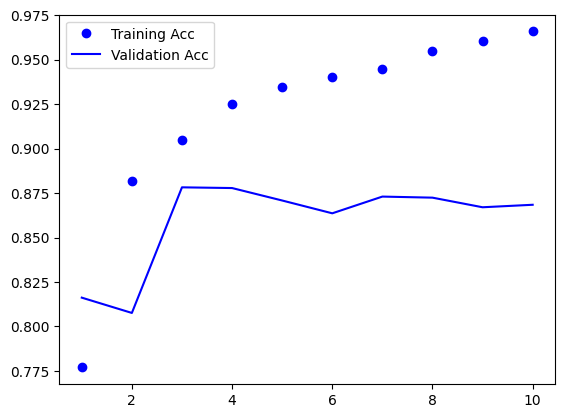

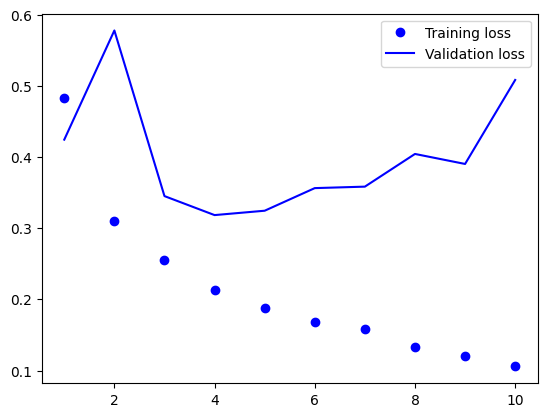

In [45]:
import matplotlib.pyplot as plt
acc= model.history.history['acc']
val_acc = model.history.history['val_acc']
epochs  = range(1,len(acc)+1)
plt.figure()
plt.plot(epochs,acc,'bo',label = "Training Acc")
plt.plot(epochs,val_acc,'b',label = "Validation Acc")
plt.legend()



loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs  = range(1,len(loss)+1)
plt.figure()
plt.plot(epochs,loss,'bo',label = "Training loss")
plt.plot(epochs,val_loss,'b',label = "Validation loss")
plt.legend()
plt.show()

In [46]:
#using bidirectional
modelbi = Sequential()
modelbi.add(layers.Embedding(max_features, 32))
modelbi.add(layers.Bidirectional(layers.LSTM(32)))
modelbi.add(layers.Dense(1, activation='sigmoid'))

In [47]:
modelbi.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = modelbi.fit(x_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 13s 69ms/step - loss: 0.6027 - acc: 0.6807 - val_loss: 0.5402 - val_acc: 0.7354
Epoch 2/10
157/157 [==============================] - 10s 65ms/step - loss: 0.3962 - acc: 0.8345 - val_loss: 0.3954 - val_acc: 0.8616
Epoch 3/10
157/157 [==============================] - 10s 63ms/step - loss: 0.2943 - acc: 0.8888 - val_loss: 0.3766 - val_acc: 0.8524
Epoch 4/10
157/157 [==============================] - 10s 65ms/step - loss: 0.2486 - acc: 0.9087 - val_loss: 0.3759 - val_acc: 0.8412
Epoch 5/10
157/157 [==============================] - 10s 65ms/step - loss: 0.2224 - acc: 0.9222 - val_loss: 0.3569 - val_acc: 0.8762
Epoch 6/10
157/157 [==============================] - 10s 66ms/step - loss: 0.1942 - acc: 0.9330 - val_loss: 0.3137 - val_acc: 0.8800
Epoch 7/10
157/157 [==============================] - 11s 69ms/step - loss: 0.1775 - acc: 0.9415 - val_loss: 0.4493 - val_acc: 0.8714
Epoch 8/10
157/157 [==============================] - 10s 66ms

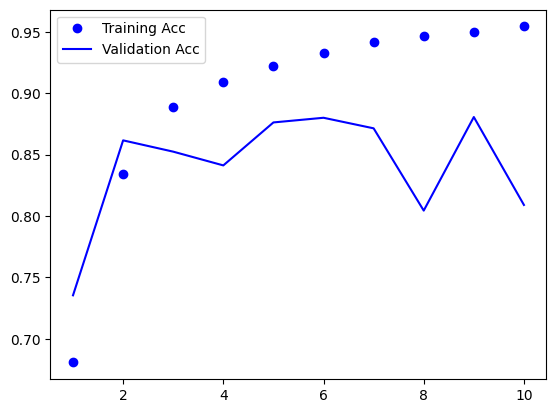

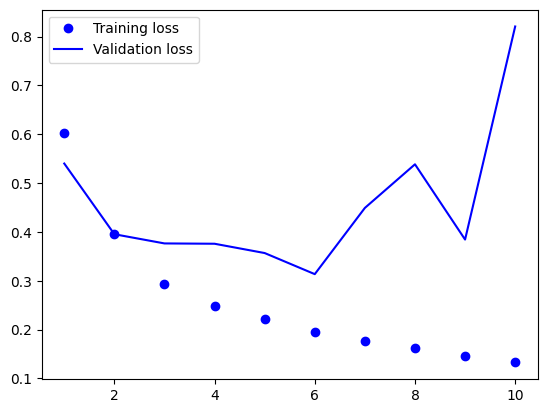

In [48]:
acc= modelbi.history.history['acc']
val_acc = modelbi.history.history['val_acc']
epochs  = range(1,len(acc)+1)
plt.figure()
plt.plot(epochs,acc,'bo',label = "Training Acc")
plt.plot(epochs,val_acc,'b',label = "Validation Acc")
plt.legend()



loss = modelbi.history.history['loss']
val_loss = modelbi.history.history['val_loss']
epochs  = range(1,len(loss)+1)
plt.figure()
plt.plot(epochs,loss,'bo',label = "Training loss")
plt.plot(epochs,val_loss,'b',label = "Validation loss")
plt.legend()
plt.show()

<h3>Using ConV for Text Preprocessing

In [50]:
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
max_features = 10000
max_len = 500
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [51]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer=RMSprop(lr=1e-4),
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(x_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           28704     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 98, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_5 (Dense)             (None, 1)                

c:\Users\M_ros\anaconda3\envs\tf2\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


157/157 [==============================] - 6s 12ms/step - loss: 0.8348 - acc: 0.5102 - val_loss: 0.6921 - val_acc: 0.5038
Epoch 2/10
157/157 [==============================] - 2s 11ms/step - loss: 0.6730 - acc: 0.6328 - val_loss: 0.6719 - val_acc: 0.5778
Epoch 3/10
157/157 [==============================] - 2s 11ms/step - loss: 0.6339 - acc: 0.7473 - val_loss: 0.6297 - val_acc: 0.7310
Epoch 4/10
157/157 [==============================] - 2s 11ms/step - loss: 0.5613 - acc: 0.8059 - val_loss: 0.5348 - val_acc: 0.7800
Epoch 5/10
157/157 [==============================] - 2s 11ms/step - loss: 0.4390 - acc: 0.8418 - val_loss: 0.4335 - val_acc: 0.8242
Epoch 6/10
157/157 [==============================] - 2s 10ms/step - loss: 0.3528 - acc: 0.8755 - val_loss: 0.4088 - val_acc: 0.8466
Epoch 7/10
157/157 [==============================] - 2s 11ms/step - loss: 0.3069 - acc: 0.8953 - val_loss: 0.4132 - val_acc: 0.8570
Epoch 8/10
157/157 [==============================] - 2s 11ms/step - loss: 0.269

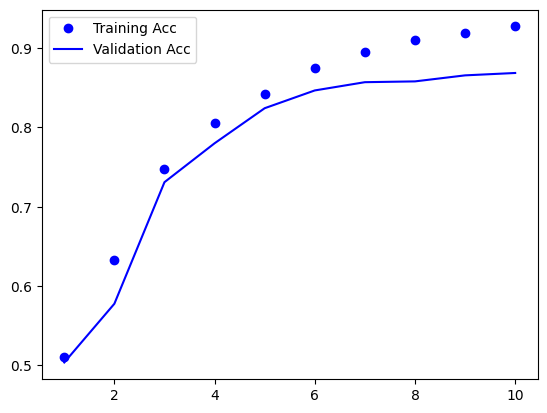

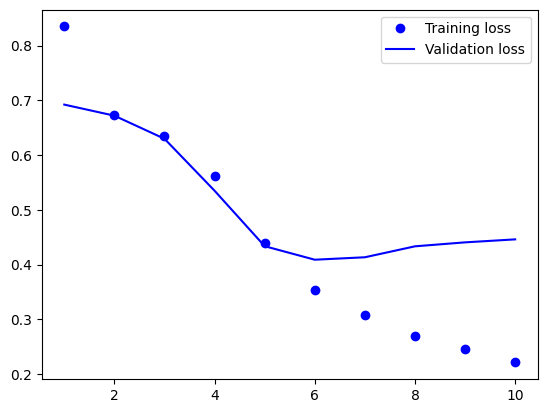

In [52]:
acc= model.history.history['acc']
val_acc = model.history.history['val_acc']
epochs  = range(1,len(acc)+1)
plt.figure()
plt.plot(epochs,acc,'bo',label = "Training Acc")
plt.plot(epochs,val_acc,'b',label = "Validation Acc")
plt.legend()



loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs  = range(1,len(loss)+1)
plt.figure()
plt.plot(epochs,loss,'bo',label = "Training loss")
plt.plot(epochs,val_loss,'b',label = "Validation loss")
plt.legend()
plt.show()